In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')

In [3]:
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [4]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [5]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [6]:
Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их 
идентификаторы (client) через запятую и пробел в порядке возрастания. Например:

SyntaxError: invalid syntax (1595473788.py, line 3)

In [ ]:
logs.query('success == True').groupby('client', as_index=False).agg({'success':'sum'}) \
            .sort_values(by = ['success', 'client'], ascending = [False, True]) \
            .query('success == 41').client.tolist()    

In [ ]:
С какой платформы было совершено наибольшее количество успешных операций?

In [ ]:
logs.query('success == True').groupby('platform', as_index=False).agg({'success':'sum'}) \
                            .sort_values(by = 'success', ascending=False)

In [ ]:
Какая платформа наиболее популярна среди премиумных клиентов?

In [9]:
#В премиум группу входят те,о которых известно,имеют они премиум-статус или нет
premium_clients_info = user_data.merge(logs, on ='client', how='inner')
premium_clients_info.platform.mode()
premium_clients_info

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [ ]:
Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет),
используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

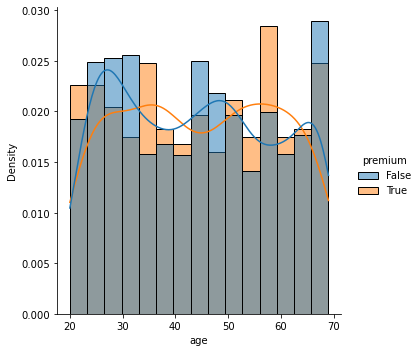

In [24]:
ax = sns.displot(data = premium_clients_info,x = 'age',hue = 'premium', stat = 'density', kde = True
                 , common_norm = False)

In [ ]:
Постройте график распределения числа успешных операций: 

x – число успешных операций
y – число клиентов, совершивших такое количество успешных операций

In [58]:
info = premium_clients_info.groupby('client').agg({'success':'sum'})

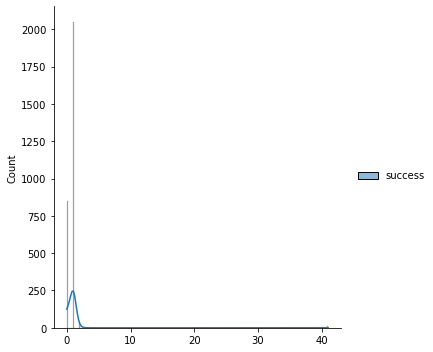

In [61]:
ax = sns.displot(data = info, kde = True)

In [ ]:
Визуализируйте число успешных операций, сделанных на платформе computer,
в зависимости от возраста, используя sns.countplot. По оси x – возраст, 
по оси y – число успешных операций. Если размер графика получается небольшим,
можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

In [70]:
age_n_success = premium_clients_info.query("platform == 'computer'&success==True") \
                    .groupby('age',as_index=False).agg({'success':sum})
age_n_success

,age,success
0,20,11
1,21,15
2,22,8
3,23,15
4,24,26
5,25,33
6,26,14
7,27,14
8,28,49
9,29,17


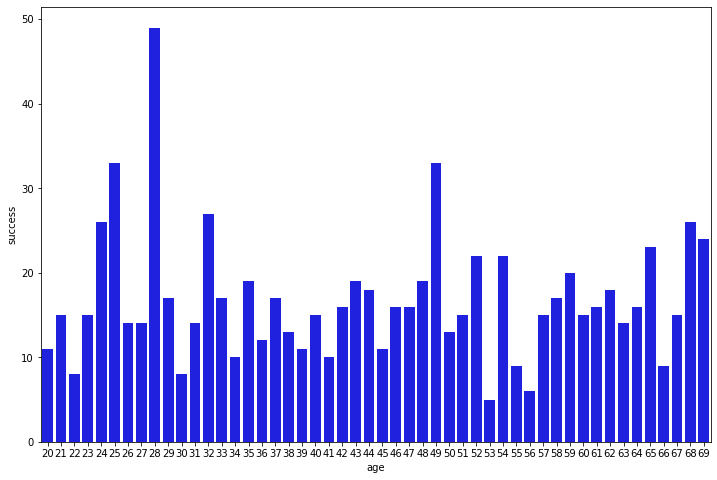

In [77]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data = age_n_success, x = 'age', y = 'success', color='blue')